# Riss 인기 학술자료 텍스트 마이닝

## 1. 사용할 패키지 설치

https://www.oracle.com/java/technologies/downloads/#jdk19-mac   
Java JDK 다운로드.   
konlpy를 사용하기 위해 필요.

에러 발생시 (M1)  
https://www.azul.com  
https://velog.io/@wijoonwu/맥북Mac-OS-M1-JDK-설치하기

In [2]:
!pip3 install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 38.8 MB/s eta 0:00:00a 0:00:01
  Using cached trio_websocket-0.10.2-py3-none-any.whl (17 kB)
  Using cached trio-0.22.0-py3-none-any.whl (384 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.0/157.0 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.2/123.2 kB 17.0 MB/s eta 0:00:00
  Using cached async_generator-1.10-py3-none-any.whl (18 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
  Using cached exceptiongroup-1.1.1-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 7.4 MB/s eta 0:00:00
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)

[notice] A new release of pip is available: 

In [3]:
!pip3 install jpype1

  Using cached JPype1-1.4.1-cp310-cp310-macosx_10_9_universal2.whl (590 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [6]:
!pip3 install konlpy

  Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
  Using cached lxml-4.9.2.tar.gz (3.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lxml: filename=lxml-4.9.2-cp310-cp310-macosx_10_9_universal2.whl size=3150017 sha256=ca71e7e035e5670509e32591306aa562707746c35563c48f657b7cdae7fa94ad
  Stored in directory: /Users/uuu9/Library/Caches/pip/wheels/5a/51/0e/95b4a6ddee4a616530c36aeb03dafb5e04183756d9973a7d5d
Successfully built lxml


## 2. 사용할 패키지 호출

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By

## 3. 프로그래밍

In [2]:
# webdriver 실행 후 riss 이동
browser = webdriver.Chrome()
browser.get("http://www.riss.kr/PopularList.do") 

In [3]:
# 현제 제공되고 있는 인기 학술자료 목록이 사용된 기간을 저장한다.
span1 = browser.find_element(By.CLASS_NAME, 'periodSpan1').text
span2 = browser.find_element(By.CLASS_NAME, 'periodSpan2').text
data_date = (span1 + "~" +span2)
data_date

'2023.6.18~2023.7.15'

In [4]:
# 페이지의 자료 확장
browser.find_element(By.ID, 'nextList').click()

In [5]:
thesis_data = browser.find_elements(By.TAG_NAME, 'tr')

csv = open(f"csv/{data_date}.csv", "a")
csv.write("논문 제목, 링크\n")
csv.close()

for thesis_data_sort in thesis_data:
    thesis_titles = thesis_data_sort.find_elements(By.CLASS_NAME, 'title')
    
    for thesis_title_data in thesis_titles:
        title = thesis_title_data.text
        link = thesis_title_data.get_attribute("href")
        
        csv = open(f"csv/{data_date}.csv", "a")
        csv.write(f"{title}, {link}\n")
        csv.close()
        
        file = open(f"txt/{data_date}.txt", "a")
        file.write(f"{title}\n")
        file.close()

In [6]:
# 저장한 텍스트 파일 읽어오기
file_data = open(f"txt/{data_date}.txt", encoding= "UTF-8").read()
file_data

'미래 사회에서 메타버스 교육의 방향\n사형제도는 폐지되어야 하는가?\n촉법소년 상한(형사미성년자) 연령 하향에 대한 비판적 고찰\n스트레스 수준이 대학생들의 학업 성취도에 미치는 영향\n노키즈존 확산, 어떻게 볼 것인가?\n챗GPT에 빼앗긴 밥그릇\n국내외 가짜뉴스(Fake News)에 대한 뉴스 공정성 연구논의 탐색\nChatGPT시대 인공지능교육정책의 문제점 고찰\nMZ 세대의 개인주의 문화, 어떻게 볼 것인가?\n[토론문 1] 저출산·고령화와 인구정책\n촉법소년 상한연령 하향 인식에의 영향요인 - 소년사법 실무전문가들을 중심으로 -\n고교학점제의 쟁점과 과제 분석\n챗GPT 충격파… 성큼 다가온 인공지능\n일본의 후쿠시마 오염수 해양 방출 계획 저지를 위한 한국의 대응 전략: 방사성물질로부터 영해 수호를 위한 정책적 제언\n대리모 산업의 윤리적 문제와 해결방안\n고교학점제 도입 추진 정책에 대한 비판적 검토\n영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구 - 신체가 있는 인공지능과 하이퍼 인공지능을 중심으로\n최저임금제도 개선방안에 관한 연구\n바이오 기술을 통한 의약품 산업의 혁신\n다이어트, 당신은 건강합니까?\n음악치료 소개와 음악이란 매개체가 갖는 특별한 우수성\n[CLICK] 음식점,카페 "노키즈존" 확산\n사상체질과 MBTI성격유형검사를 통한 대학생 건강염려증의 상관관계연구\n미혼 성인남녀의 저출산 정책 인식에 관한 연구\n그리스-로마 신화의 교훈\n우리 사회의 능력주의는 제대로 작동하고 있는가?\n미국의 청소년 마약류 사용 대응 정책 고찰을 통한 국내 정책의 시사점\n한국 인공지능 교육의 방향\n최근 5년간 한국 의학드라마에 나타난 간호사 이미지와 역할 수행에 대한 연구\n자동창작시대의 예술 작품 -인공지능은 예술 창작의 주체가 될 수 있는가?\n챗봇 기반 인공지능 교육 프로그램 개발과 적용\nMZ세대의 MBTI에 따른 여가활동 선택과 여가태도\n자연 상태에서 일어나는 음펨바 효과에 대한 연구\n펜타닐에 대한 중독경험자와 전문가

In [7]:
# 불필요한 문자 제거
# '[^가-힣]' : 한글이 아닌 모든 문자
import re
file_data = re.sub('[^가-힣]', ' ', file_data)
file_data

'미래 사회에서 메타버스 교육의 방향 사형제도는 폐지되어야 하는가  촉법소년 상한 형사미성년자  연령 하향에 대한 비판적 고찰 스트레스 수준이 대학생들의 학업 성취도에 미치는 영향 노키즈존 확산  어떻게 볼 것인가  챗   에 빼앗긴 밥그릇 국내외 가짜뉴스           에 대한 뉴스 공정성 연구논의 탐색        시대 인공지능교육정책의 문제점 고찰    세대의 개인주의 문화  어떻게 볼 것인가   토론문    저출산 고령화와 인구정책 촉법소년 상한연령 하향 인식에의 영향요인   소년사법 실무전문가들을 중심으로   고교학점제의 쟁점과 과제 분석 챗    충격파  성큼 다가온 인공지능 일본의 후쿠시마 오염수 해양 방출 계획 저지를 위한 한국의 대응 전략  방사성물질로부터 영해 수호를 위한 정책적 제언 대리모 산업의 윤리적 문제와 해결방안 고교학점제 도입 추진 정책에 대한 비판적 검토 영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구   신체가 있는 인공지능과 하이퍼 인공지능을 중심으로 최저임금제도 개선방안에 관한 연구 바이오 기술을 통한 의약품 산업의 혁신 다이어트  당신은 건강합니까  음악치료 소개와 음악이란 매개체가 갖는 특별한 우수성         음식점 카페  노키즈존  확산 사상체질과     성격유형검사를 통한 대학생 건강염려증의 상관관계연구 미혼 성인남녀의 저출산 정책 인식에 관한 연구 그리스 로마 신화의 교훈 우리 사회의 능력주의는 제대로 작동하고 있는가  미국의 청소년 마약류 사용 대응 정책 고찰을 통한 국내 정책의 시사점 한국 인공지능 교육의 방향 최근  년간 한국 의학드라마에 나타난 간호사 이미지와 역할 수행에 대한 연구 자동창작시대의 예술 작품  인공지능은 예술 창작의 주체가 될 수 있는가  챗봇 기반 인공지능 교육 프로그램 개발과 적용   세대의     에 따른 여가활동 선택과 여가태도 자연 상태에서 일어나는 음펨바 효과에 대한 연구 펜타닐에 대한 중독경험자와 전문가의 인식 차이 인지발달에 대한 삐아제 이론과 비고츠키 이론의

#### m1 맥에서 jvm을 제대로 찾지 못하는 이슈가 있었음.
#### 맨 위의 링크를 통해 설치하고 경로를 직접 설정
#### https://github.com/konlpy/konlpy/issues/353 해당 페이지 참조

In [8]:
# 명사 추출
import konlpy
JVM_PATH = '/Library/Java/JavaVirtualMachines/zulu-11.jdk/Contents/Home/bin/java'


hannanum = konlpy.tag.Hannanum(jvmpath=JVM_PATH)
nouns_data = hannanum.nouns(file_data)
print(nouns_data)


['미래', '사회', '메타버스', '교육', '방향', '사형제도', '폐', '촉법소년', '형사미성년자', '연령', '하향', '비판적', '고찰', '스트레스', '수준', '대학생들', '학업', '성취도', '영향', '노키즈존', '확산', '것', '챗', '밥그릇', '국내외', '가짜뉴스', '뉴스', '공정성', '연구논', '탐색', '시대', '인공지능교육정책', '문제점', '고찰', '세대', '개인주의', '문화', '것', '토론문', '저출산', '고령화', '인구정책', '촉법소년', '상한연령', '하향', '식', '영향요', '소년사법', '실무전문가들', '중심', '고교학점제', '쟁점', '과제', '분석', '챗', '충격파', '인공지능', '일본', '후쿠시마', '오염수', '해양', '방출', '계획', '한국의', '대응', '전략', '방사성물질', '수호', '정책적', '제언', '대리모', '산업', '윤리적', '문제', '해결방안', '고교학점제', '도입', '추진', '정책', '비판적', '검토', '영화', '속', '인공지능', '인간화', '인간지배', '현상', '연구', '신체', '인공지능', '하이퍼', '인공지능', '중심', '최저임금제', '개선방안', '연구', '바', '기술', '의약품', '산업', '혁신', '다이어트', '당신', '건강', '음악치료', '소개', '음악', '매개체', '특별', '우수성', '음식점', '카페', '노키즈존', '확산', '사상체질', '성격유형검사', '대학생', '건강염려증', '상관관계연구', '미혼', '성인남녀', '저출산', '정책', '식', '연구', '그리스', '로마', '신화', '교훈', '우리', '사회', '능력주의', '작동', '미국', '청소년', '마약', '사용', '대응', '정책', '고찰', '국내', '정책', '시사점', '한국', '인공지능', '교육', '방향', '년', '

In [9]:
import pandas as pd
df_word = pd.DataFrame({'word' : nouns_data})
df_word

,word
0,미래
1,사회
2,메타버스
3,교육
4,방향
...,...
546,중심
547,국내기업
548,경영동기
549,경영전략


In [10]:
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,미래,2
1,사회,2
2,메타버스,4
3,교육,2
4,방향,2
...,...,...
546,중심,2
547,국내기업,4
548,경영동기,4
549,경영전략,4


In [11]:
df_word = df_word.groupby('word', as_index=False)\
    .agg(n = ('word', 'count'))\
        .sort_values('n', ascending=False)
df_word

,word,n
250,인공지능,24
211,연구,20
41,교육,7
301,중심,6
255,인식,6
...,...,...
136,분리불안,1
135,보장,1
134,보웬,1
133,보건의료,1


In [12]:
# 단어 빈도 막대 그래프
top20 = df_word.head(20)

In [13]:
!pip3 install seaborn

<Axes: xlabel='n', ylabel='word'>

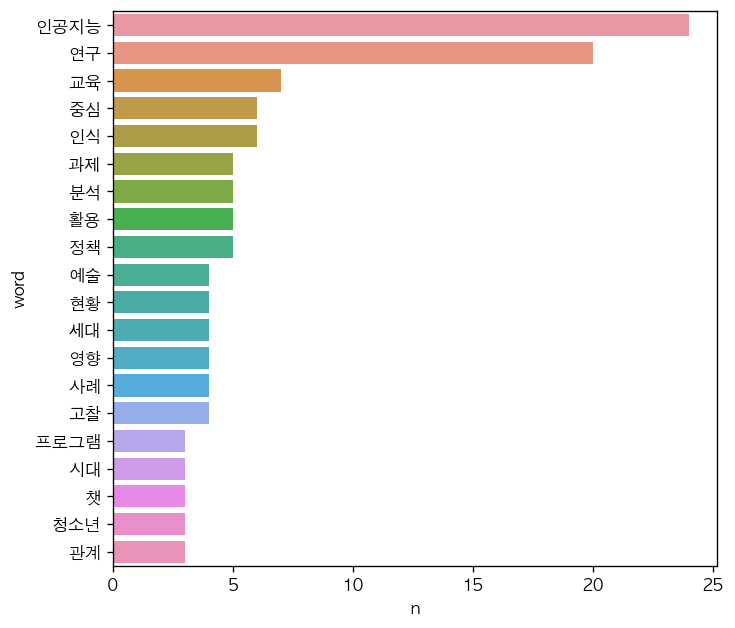

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트의 경우 
# https://github.com/GUuu9/Nas_Docker_jupyter_Ko_fonts
# 해당 페이지을 참고하여 폰트 설정

plt.rcParams.update({'font.family' : 'AppleGothic',
                    'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

bar_data = sns.barplot(data = top20, y = 'word', x= 'n')
plt.savefig(f'barplot/{data_date}.png', dpi=300)
bar_data

In [15]:
# 워드 클라우드 생성
!pip3 install wordcloud

In [16]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'인공지능': 24,
 '연구': 20,
 '교육': 7,
 '중심': 6,
 '인식': 6,
 '과제': 5,
 '분석': 5,
 '활용': 5,
 '정책': 5,
 '예술': 4,
 '현황': 4,
 '세대': 4,
 '영향': 4,
 '사례': 4,
 '고찰': 4,
 '프로그램': 3,
 '시대': 3,
 '챗': 3,
 '청소년': 3,
 '관계': 3,
 '창의성': 3,
 '이용': 3,
 '저출산': 3,
 '문제': 3,
 '간호사': 3,
 '변화': 3,
 '방향': 3,
 '효과': 3,
 '방안': 3,
 '적용': 3,
 '건강': 3,
 '수': 3,
 '촉법소년': 2,
 '노키즈존': 2,
 '이론': 2,
 '서비스': 2,
 '다이어트': 2,
 '대응': 2,
 '차': 2,
 '초': 2,
 '능력주의': 2,
 '사용': 2,
 '산업': 2,
 '사회': 2,
 '사이코패스': 2,
 '마약': 2,
 '기반': 2,
 '사례연구': 2,
 '주': 2,
 '비판적': 2,
 '일제': 2,
 '제정': 2,
 '제언': 2,
 '문해력': 2,
 '미래': 2,
 '전망': 2,
 '장애': 2,
 '기술': 2,
 '메타버스': 2,
 '하향': 2,
 '고교학점제': 2,
 '우리': 2,
 '필요': 2,
 '시사점': 2,
 '식': 2,
 '한국': 2,
 '오염수': 2,
 '오가노이드': 2,
 '행동': 2,
 '스마트시티': 2,
 '것': 2,
 '개발': 2,
 '확산': 2,
 '안전성': 2,
 '간호법': 2,
 '가족치료': 2,
 '후쿠시마': 2,
 '교양교육': 2,
 '의': 2,
 '윤리적': 2,
 '윤리': 2,
 '국내외': 2,
 '수학적': 2,
 '국내': 2,
 '이슈': 1,
 '자동화': 1,
 '영향요': 1,
 '영역': 1,
 '입장': 1,
 '자기결정권': 1,
 '열차': 1,
 '자동창작시대': 1,
 '연령': 1,
 '을': 1,
 '임파워먼트': 

In [17]:
from wordcloud import WordCloud
we = WordCloud(random_state = 1234,
              font_path = 'AppleGothic',
              width = 400,
              height = 400,
              background_color = 'white')

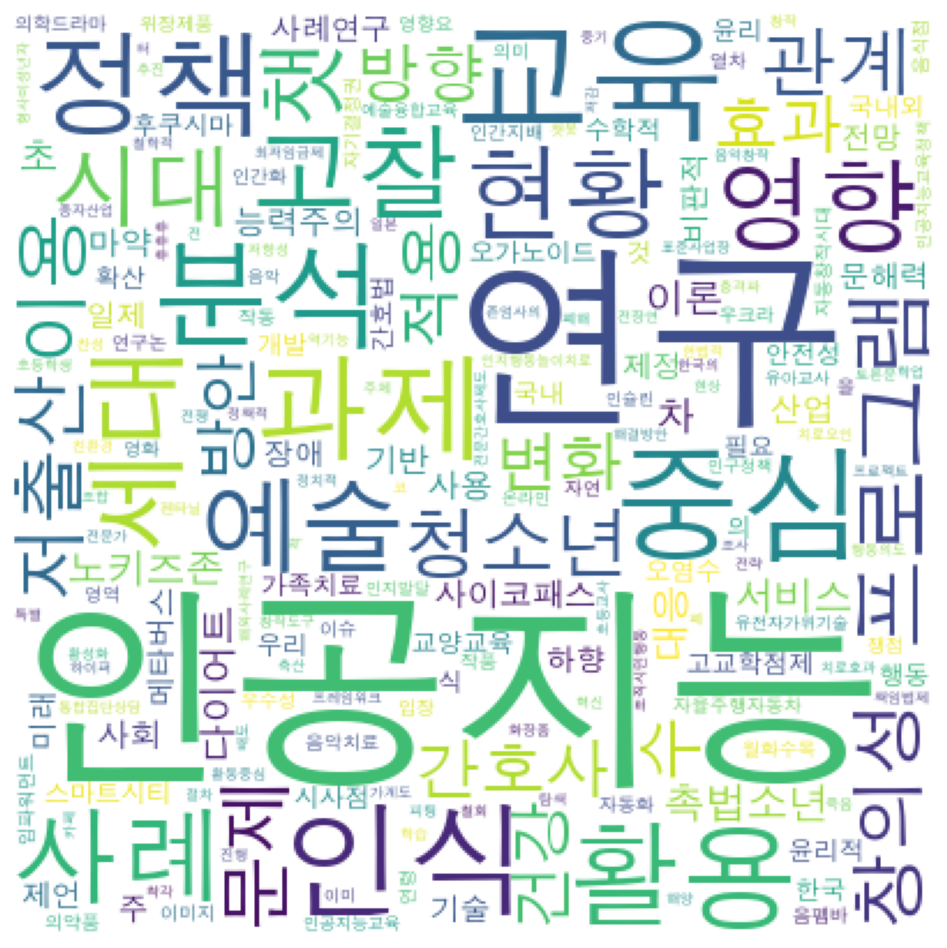

In [18]:
img_wordcloud = we.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
img_wordcloud = plt.imshow(img_wordcloud)
plt.savefig(f'wordcloud/{data_date}.png', dpi=300)
img_wordcloud

➜Riss_Popular_thesis_wordCloud git:(main) ✗ git init  

➜  Riss_Popular_thesis_wordCloud git:(main) ✗ git add .  

➜  Riss_Popular_thesis_wordCloud git:(main) ✗ git commit -m "init commit"  

➜  Riss_Popular_thesis_wordCloud git:(main) git branch -M main  

➜  Riss_Popular_thesis_wordCloud git:(main) git push origin main  


에러 발생시
git push -f origin 명령으로 강제 업로드